In [19]:
import os
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mgmt_labels_path = "/data/slow/BRATS_2021/train_labels.csv"
pd.read_csv(mgmt_labels_path).head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [3]:
files_volume_paths = "/data/slow/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/"
os.listdir(files_volume_paths)[0]

'BraTS2021_00820'

In [4]:
def get_volume_and_segmentation(patient_id_list: list, mgmt_label_list: list) -> pd.DataFrame:
    
    files_volume_paths = os.listdir("/data/slow/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/")
    
    all_ids = [int(file.split("_")[-1]) for file in files_volume_paths]
    
    files = []
    labels = []
    
    for patient_id, mgmt_label in zip(patient_id_list, mgmt_label_list):
    
        try:

            index = all_ids.index(patient_id)

            files.append(files_volume_paths[index]) 
            labels.append(mgmt_label)
                
        except:

            print(f"Patient {patient_id} not found in BraTS task 1 data.")
            
    return pd.DataFrame(data={
        "files": files,
        "labels": labels
    })

In [5]:
df = pd.read_csv(mgmt_labels_path) 
df.head()

,BraTS21ID,MGMT_value
0,0,1
1,2,1
2,3,0
3,5,1
4,6,1


In [6]:
df_with_path_and_label = get_volume_and_segmentation(df["BraTS21ID"].values, df["MGMT_value"].values)

Patient 169 not found in BraTS task 1 data.
Patient 197 not found in BraTS task 1 data.
Patient 245 not found in BraTS task 1 data.
Patient 308 not found in BraTS task 1 data.
Patient 408 not found in BraTS task 1 data.
Patient 564 not found in BraTS task 1 data.
Patient 794 not found in BraTS task 1 data.
Patient 998 not found in BraTS task 1 data.


In [7]:
df_with_path_and_label.head()

,files,labels
0,BraTS2021_00000,1
1,BraTS2021_00002,1
2,BraTS2021_00003,0
3,BraTS2021_00005,1
4,BraTS2021_00006,1


## Class balance

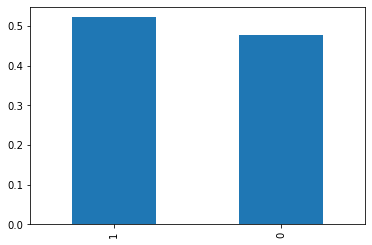

In [8]:
df_with_path_and_label["labels"].value_counts(normalize=True).plot.bar()
plt.show()

## Paths creation

In [9]:
df_with_path_and_label.head()

,files,labels
0,BraTS2021_00000,1
1,BraTS2021_00002,1
2,BraTS2021_00003,0
3,BraTS2021_00005,1
4,BraTS2021_00006,1


In [10]:
df_with_path_and_label["x"] = df_with_path_and_label["files"].apply(lambda x: f"/data/slow/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/{x}/{x}_t2.nii.gz")
df_with_path_and_label["y"] = df_with_path_and_label["files"].apply(lambda x: f"/data/slow/RSNA_ASNR_MICCAI_BraTS2021_TrainingData/{x}/{x}_seg.nii.gz")

In [11]:
df_with_path_and_label.head()

,files,labels,x,y
0,BraTS2021_00000,1,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...
1,BraTS2021_00002,1,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...
2,BraTS2021_00003,0,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...
3,BraTS2021_00005,1,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...
4,BraTS2021_00006,1,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...,/data/slow/RSNA_ASNR_MICCAI_BraTS2021_Training...


In [12]:
df_with_path_and_label.to_csv("Data/MGMT.csv", index=False)

In [20]:
def get_data(img):
    
    data = img.get_fdata()
    
    for i, aff in enumerate(np.diag(img.affine)[:-1]):
        if aff < 0:
            data = np.flip(data, axis=i)

    return data

In [22]:
x = nib.load(df_with_path_and_label["x"].values[0])
x = get_data(x)

y = nib.load(df_with_path_and_label["y"].values[0])
y = get_data(y)


In [14]:
# x_t = x.transpose(2, 0, 1)
# y_t = y.transpose(2, 0, 1)

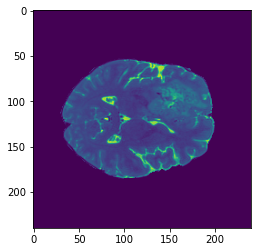

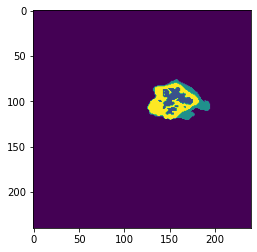

In [30]:
plt.imshow(x[:, :, 75])
plt.show()

plt.imshow(y[:, :, 75])
plt.show()